# Integration

There are several ways to evaluate integrals with limits numerically.  One way is to use scipy's "quad" function.  Let's try this out on the integral 
$$\int_0^1 \sqrt{\frac{x}{2-x}} dx.$$

## Analytic Solution

The analytic solution is found if we make the substitution $x = 2\sin^2 \theta$ so $dx = 4 \cos \theta \sin \theta d\theta$.  This also changes the limits from 0 to 1 to 0 to $\pi/4$. 
Now, we can evaluate the integral using standard tricks
\begin{align}
    \int_0^1 \sqrt{\frac{x}{2-x}} dx &= \int_0^{\pi/4} \sqrt{ \frac{2 \sin^2 \theta}{2 - 2 \sin^2 \theta} } 4 \cos \theta \sin \theta d\theta \\
    &= \int_0^{\pi/4}  \sin^2 \theta d\theta \\
    &= 2 \int_0^{\pi/4} (1-\cos 2 \theta) d\theta \\
    &= 2 \left[ 1 - \frac{\sin 2\theta}{2}\right]_0^{\pi/4} \\
    &= \frac{\pi}{2} - 1.
\end{align}
Now let's see how to find this numerically.

## Using scipy's "quad" function

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

xv = np.linspace(0, 1.5, 500)

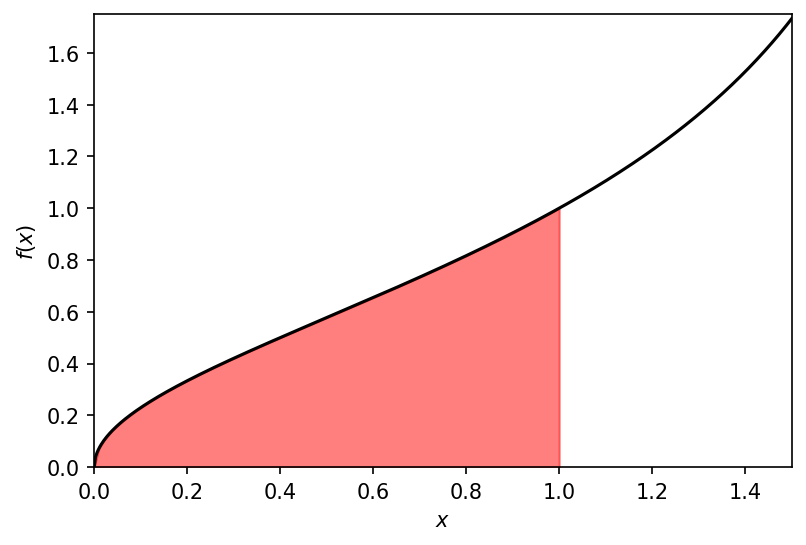

In [2]:
# Start by defining the integrand
def f(x):
    return np.sqrt(x/(2.0-x))
    
plt.figure(dpi=150)
plt.plot(xv, f(xv), 'k-')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.fill_between(np.linspace(0,1,100), f(np.linspace(0,1,100)), np.zeros(100), color="red", alpha=0.5)
plt.xlim(0,1.5)
plt.ylim(0, 1.75)

plt.show()

In [3]:
# Now, just use scipy's quad to integrate
# This returns the value of the integral and an estimate of the error
I,err = spi.quad(f, 0, 1)

In [4]:
exact = np.pi/2 - 1.0 # Found analytically
print("Exact Answer = {0}".format(exact))
print("I = {0}, Error = {1}".format(I, err))
print("Difference between exact and numerical answer = {0}".format(np.abs(exact-I) ))

Exact Answer = 0.5707963267948966
I = 0.5707963267948968, Error = 4.4280690225662056e-11
Difference between exact and numerical answer = 2.220446049250313e-16


## Monte-Carlo Integration

Another (more fun) method of numerical integration is the [Monte-Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_integration).
This involves generating a load of random numbers in a box that you know the area of.
You then count how many of the points sit in the red area of the curve (this is what we're trying to find), $N_I$.  
Dividing this by the total number of points you've generated $N_I/N$ gives you something like the probability that a point generated inside the box you've chosen will be in the area you're trying to find.
Multiplying this probability by the total area of the box $A$ gives an approximaion to the integral, $I \approx A N_I / N$.
More information and ways to improve this approximation can be found in [1].

In the cells below we apply this method to the integral we were considering at the start of this notebook.
We also see how the error of the Monte-Carlo method depends on the number of sample points used.  It also depends on how the sample points you generate are distributed, but this is another [topic](https://en.wikipedia.org/wiki/Quasi-Monte_Carlo_method).

### References:
1. Press, WH; Teukolsky, SA; Vetterling, WT; Flannery, BP (2007). Numerical Recipes: The Art of Scientific Computing (3rd ed.). New York: Cambridge University Press

In [5]:
import numpy.random as npr
from tqdm import tqdm

In [6]:
def monte_carlo(N):
    N = int(N)
    N_inside = 0
    limx = 1
    limy = 2
    A = limx*limy
    for i in tqdm( range(N) ):
        random_x, random_y = npr.uniform(0, limx), npr.uniform(0, limy)
        if random_y < f(random_x):
            N_inside += 1
    return A * N_inside / N

In [7]:
Nv = [10,100,1000, 1e4, 1e5, 1e6]
results = []
for N in Nv:
    results.append(monte_carlo(N))
results=np.array(results)
Nv = np.array(Nv)

100%|█████████████████████████████████████████████████| 1000000/1000000 [00:05<00:00, 176883.87it/s]


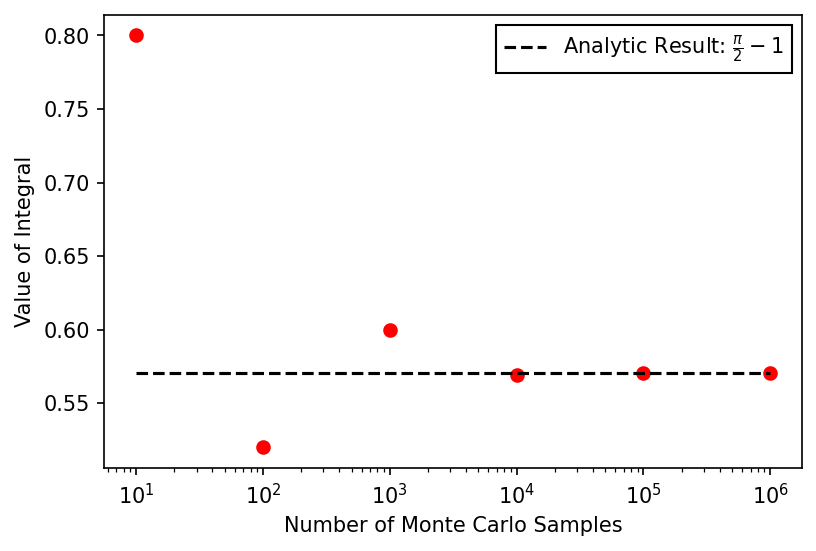

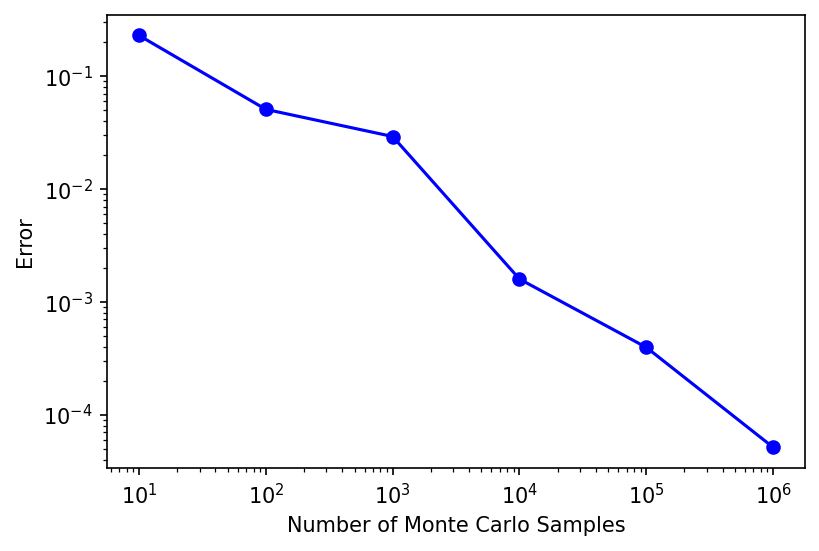

In [9]:
plt.figure(dpi=150)
plt.semilogx(Nv, results, 'ro')
plt.semilogx(Nv, np.ones_like(Nv)*(np.pi/2 -1), 'k--', label="Analytic Result: $\\frac{\\pi}{2} - 1$")
plt.xlabel("Number of Monte Carlo Samples")
plt.ylabel("Value of Integral")
plt.legend(fancybox=False, edgecolor="k", framealpha=1)

error = np.abs( (np.pi/2 - 1) - results )

plt.figure(dpi=150)
plt.loglog(Nv, error, 'bo-')
plt.xlabel("Number of Monte Carlo Samples")
plt.ylabel("Error")

plt.show()